<a href="https://colab.research.google.com/github/devadathprabhu/DSC621/blob/main/SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NFHS_5_Factsheets_Data_Processed_Minimal.csv to NFHS_5_Factsheets_Data_Processed_Minimal.csv


In [3]:
import pandas as pd
import numpy as np
import io
data = pd.read_csv(io.BytesIO(uploaded['NFHS_5_Factsheets_Data_Processed_Minimal.csv']))

In [32]:
data_total = data.loc[data['Area'] == 'Total']
data_total = data_total.loc[data_total['States/UTs'] != 'India']
literate_women = data_total["Women (age 15-49) who are literate4 (%)"].to_numpy().astype(float)
own_mobile_women = data_total["Women (age 15-49 years) having a mobile phone that they themselves use (%)"].to_numpy().astype(float)
data_states = data_total["States/UTs"].to_numpy()

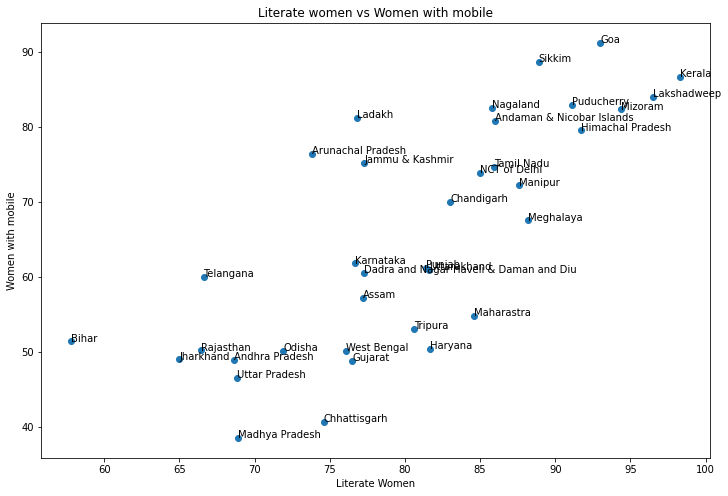

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(literate_women, own_mobile_women)
plt.title("Literate women vs Women with mobile")
plt.xlabel("Literate Women")
plt.ylabel("Women with mobile")
for i, label in enumerate(data_states):
    plt.annotate(label, (literate_women[i], own_mobile_women[i]))
plt.show()

In [ ]:
# There is a strong relationship between literate women and women with mobile. Higher the literate women, higher the women who own mobile

In [6]:
X = literate_women
y = own_mobile_women

In [25]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets with 7:3 ratio respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [26]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [27]:
# Fitting the resgression line
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

array([-19.47052995,   1.06796507])

In [28]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     32.79
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           7.85e-06
Time:                        07:16:43   Log-Likelihood:                -91.212
No. Observations:                  25   AIC:                             186.4
Df Residuals:                      23   BIC:                             188.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.4705     15.234     -1.278      0.214     -50.985      12.044
x1             1.0680      0.187      5.726      0.000       0.682       1.454
==============================================================================
Omnibus:                        0.105   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.049
Skew:                          -0.054   Prob(JB):                        0.976
Kurtosis:                       2.811   Cond. No.                         642.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Constant is -19.47
# Coefficient for X is 1.068
# R^2 is 0.588 (which means ~60% of variance in women with mobile can be explanied by literate women)

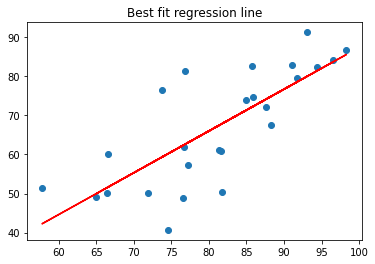

In [37]:
plt.scatter(X_train, y_train)
plt.plot(X_train, -19.4705 + 1.068*X_train, 'r')
plt.title("Best fit regression line")
plt.show()

In [12]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


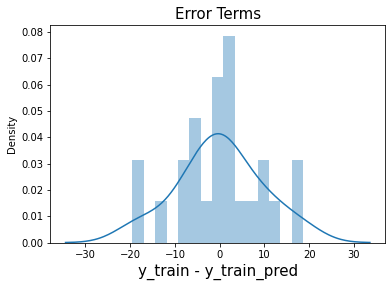

In [13]:
# Plotting the histogram using the residual values
import seaborn as sns
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

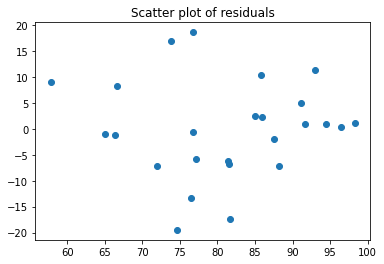

In [34]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.title("Scatter plot of residuals")
plt.show()

In [ ]:
# Since the Residuals follow a normal distribution and do not follow any specific pattern, we can use the linear regression model we have built to evaluate test data.

In [15]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

array([72.37446605, 70.87931495, 66.60745467, 61.80161186, 63.08316994,
       63.08316994, 75.47156475, 54.00546685, 69.17057084, 53.79187383,
       54.11226335])

In [16]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.4838948447139766

In [35]:
# The R^2 for test data is 0.48
# The R^2 for training data was 0.58, which was seen before
# There is a difference in ~17.25% between R^2 of test and training data. The model could be improved for better results by training with more rows in dataset.

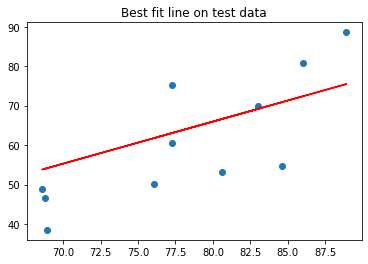

In [36]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.title("Best fit line on test data")
plt.show()